In [1]:
from types import ModuleType
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

# Path to the animation optimization module. We have to load the script
# directly into the notebook, because using 'import' caused errors from
# the usage of the 'bpy' module in __init__.py (we don't need that)
file_path = 'mcblend/operator_func/animation_optimization.py'

# Read the file content
with open(file_path, 'r') as f:
    source_code = f.read()

# Create a new module
module_name = 'animation_optimization_direct'
module = ModuleType(module_name)

# Add the module to sys.modules
sys.modules[module_name] = module

# Execute the source code in the module's namespace
exec(source_code, module.__dict__)

# Now you can use the classes and functions from the module
AnimationOptimizer = module.AnimationOptimizer

In [2]:
xFunc = lambda x: math.sin(x*90*math.pi/180)

raw_animation = {
	"format_version": "1.8.0",
	"animations": {
		"animation.animation1": {
			"animation_length": 2.4583333333333335,
			"bones": {
				"Bone": {
					"position": {
						str(x): [xFunc(x), 0, 0]
						for x in np.arange(0, 4, 0.1) 
					}
				}
			},
			"loop": True
		}
	}
}

In [3]:
def plot_animation(animation, realFunc, title):
    positions = animation["animations"]["animation.animation1"]["bones"]["Bone"]["position"]
    float_keys = [float(k) for k in positions.keys()]
    keys_sorted = sorted(float_keys)
    x = keys_sorted
    y = [positions[str(k)][0] for k in keys_sorted]
    x_min = min(x)
    x_max = max(x)
    x_high_precision = np.linspace(x_min, x_max, 1000)
    y_high_precision = [realFunc(x) for x in x_high_precision]
    plt.plot(
        x_high_precision,
        y_high_precision,
        color="#f2b1ae",
        linewidth=8,
        zorder=1,
        label="Original values")
    plt.plot(
        x, y, color="#268cbf", linestyle="--", zorder=2,
        label="Interpolated keyframe values"
    )
    plt.scatter(x, y, color="#3c58c9", zorder=3, label="Keyframes")
    plt.xlabel('Time (seconds)')
    plt.ylabel('Value')
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.legend()
    plt.show()

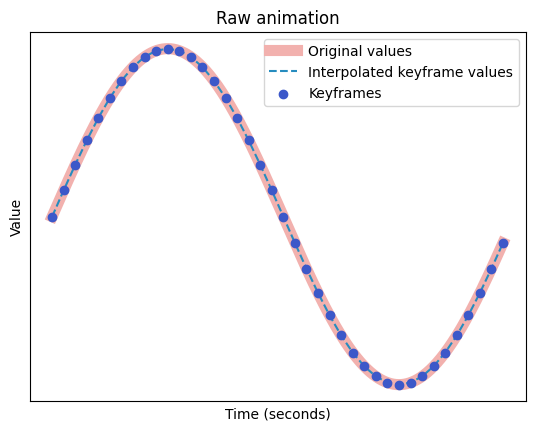

In [4]:
plot_animation(raw_animation, xFunc, "Raw animation")


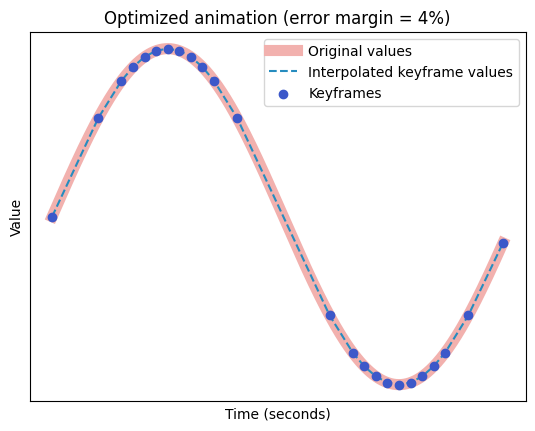

In [5]:
optimized_animation = AnimationOptimizer(error_margin=0.04).optimize_animation(deepcopy(raw_animation))
plot_animation(optimized_animation, xFunc, "Optimized animation (error margin = 4%)")

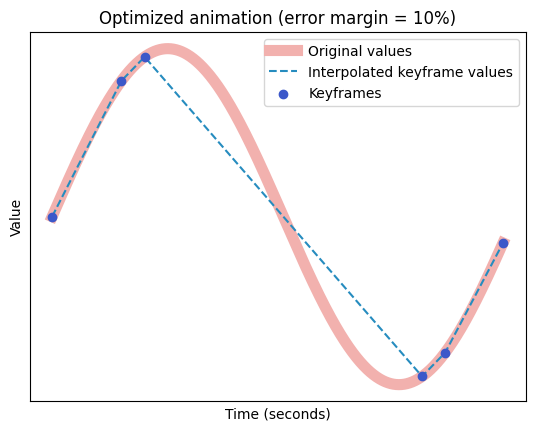

In [6]:
optimized_animation = AnimationOptimizer(error_margin=0.1).optimize_animation(deepcopy(raw_animation))
plot_animation(optimized_animation, xFunc, "Optimized animation (error margin = 10%)")

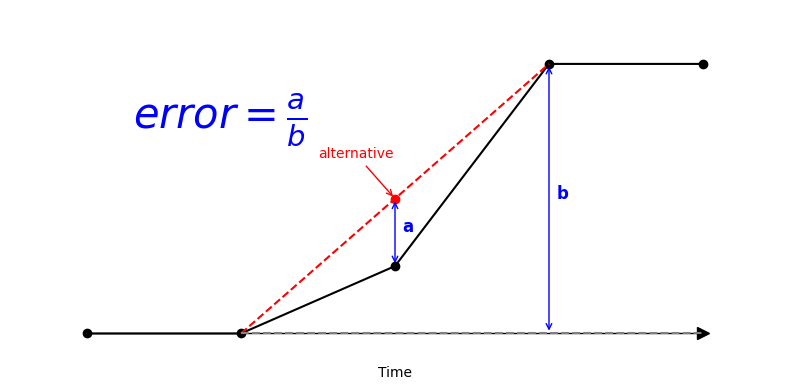

In [7]:
# A plot that illustrates the optimization algorithm
fig, ax = plt.subplots(figsize=(8, 4))

# Define the keyframe points
x = [0, 1, 2, 3, 4]
y = [y_val for y_val in [0, 0, 0.25, 1, 1]]

# Alternative point and its interpolation neighbors
alt_x = [1, 2, 3]
alt_y = [y_val for y_val in [0, 0.5, 1]]

# Draw x-axis with arrow
ax.plot([0, 4], [0, 0], color='black', linewidth=1)
ax.plot([4], [0], 'k>', markersize=8)  # Add arrow at the end
ax.set_xlabel("Time")

# Draw main keyframe points and lines
ax.plot(x, y, 'ko-')

# Draw alternative point
ax.plot(2, 0.5, 'ro')
# Add label to the red point
ax.annotate('alternative', xy=(2, 0.5), xytext=(1.5, 0.65), 
            color='red', fontsize=10,
            arrowprops=dict(arrowstyle='->', color='red', lw=1))

# Draw red dotted interpolation line
ax.plot(alt_x, alt_y, 'r--')

# Draw blue bidirectional vertical lines
ax.annotate('', xy=(2, 0.25), xytext=(2, 0.5), 
            arrowprops=dict(arrowstyle='<->', color='blue'))
ax.annotate('', xy=(3, 0), xytext=(3, 1), 
            arrowprops=dict(arrowstyle='<->', color='blue'))

# Add labels "a" and "b" to the blue arrows
ax.text(2.05, 0.375, 'a', color='blue', fontsize=12, fontweight='bold')
ax.text(3.05, 0.5, 'b', color='blue', fontsize=12, fontweight='bold')

# Add error equation in top left corner with proper fraction formatting
ax.text(0.3, 0.9, r'$error = \frac{a}{b}$', fontsize=30, ha='left', va='top', color='blue')

# Draw gray dashed interpolation baseline
ax.plot([1, 4], [0, 0], color='gray', linestyle='--')

# Remove ticks and legend
ax.set_xticks([])
ax.set_yticks([])
ax.legend_.remove() if ax.legend_ else None

# Remove most of the frame around the plot, but keep bottom (x-axis)
for spine_name, spine in ax.spines.items():
    spine.set_visible(False)

# Set plot limits and aspect
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(-0.1, 1.2)
ax.set_aspect('auto')
ax.grid(False)

plt.tight_layout()
plt.show()